In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

In [ ]:
# Load dataset
data = pd.read_csv('Mall_Customers.csv')

In [ ]:
# Display first few rows
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
data.isnull().sum()

,0
CustomerID,0
Genre,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


In [ ]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Distribution of Age, Annual Income, Spending Score
plt.figure(figsize=(15,4))

<Figure size 1500x400 with 0 Axes>

<Figure size 1500x400 with 0 Axes>

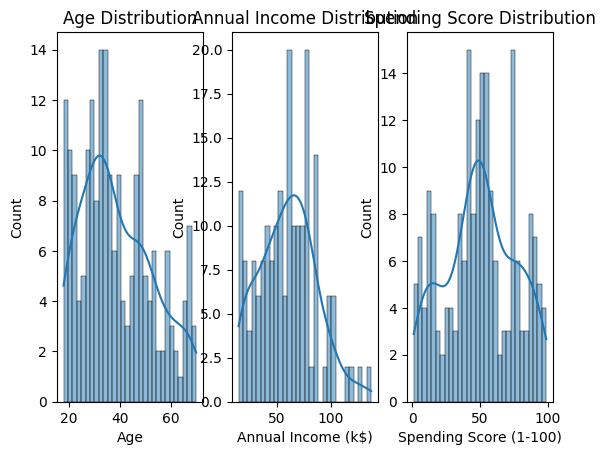

In [ ]:
plt.subplot(1,3,1)
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.subplot(1,3,2)
sns.histplot(data['Annual Income (k$)'], bins=30, kde=True)
plt.title('Annual Income Distribution')
plt.subplot(1,3,3)
sns.histplot(data['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.show()

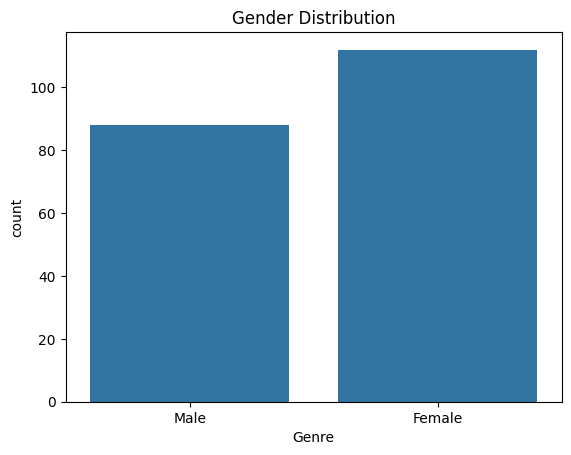

In [ ]:
# Count plot for Gender
sns.countplot(x='Genre', data=data)
plt.title('Gender Distribution')
plt.show()

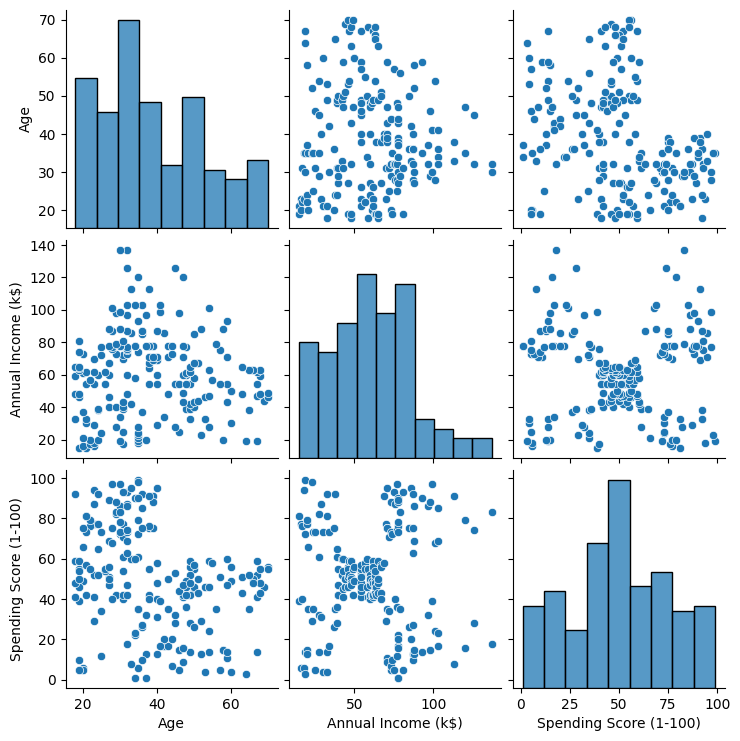

In [ ]:
# Pairplot to see relationships
sns.pairplot(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

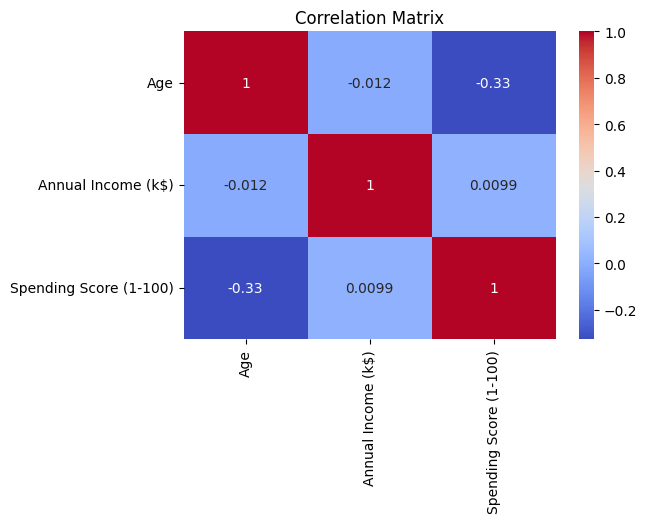

In [ ]:
# Correlation heatmap
plt.figure(figsize=(6,4))
sns.heatmap(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Select features for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

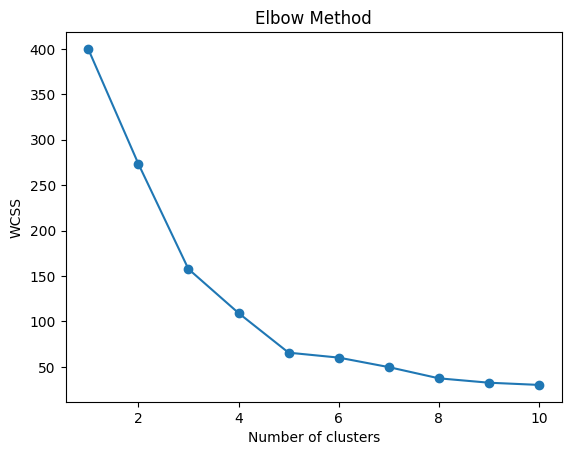

In [ ]:
# Use Elbow Method to find optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# From the elbow plot, choose optimal clusters (e.g., 5)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

In [ ]:
# Add cluster labels to original data
data['Cluster'] = clusters

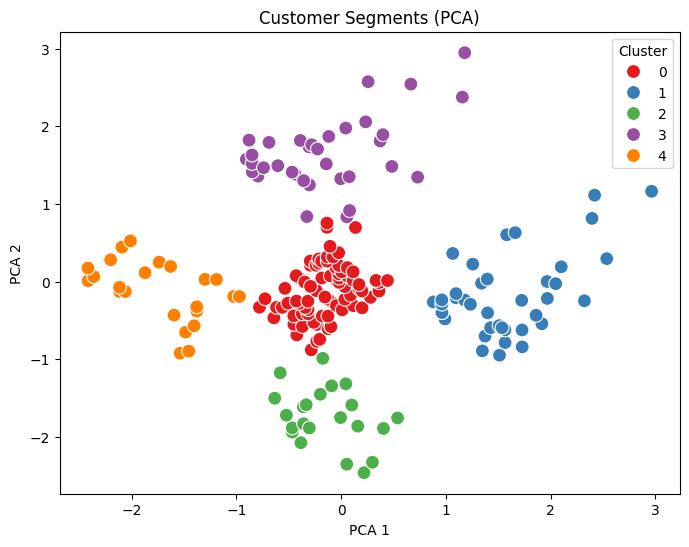

In [ ]:
# PCA Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments (PCA)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(title='Cluster')
plt.show()

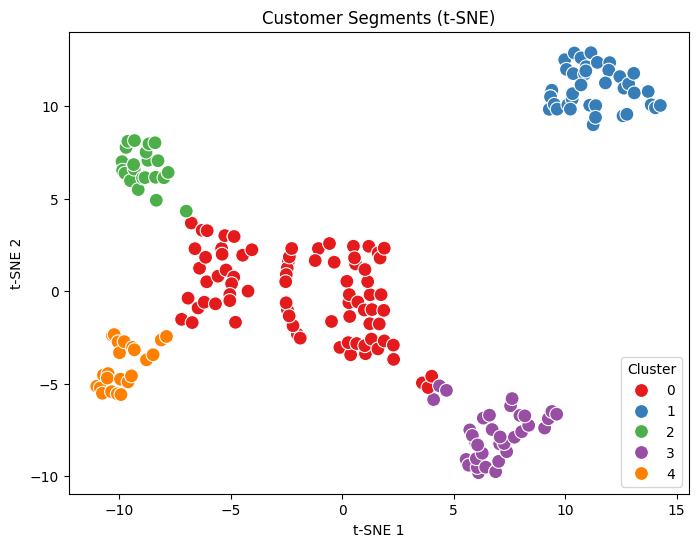

In [ ]:
# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=data['Cluster'], palette='Set1', s=100)
plt.title('Customer Segments (t-SNE)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Cluster summary statistics
cluster_summary = data.groupby('Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
cluster_summary

,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,25.272727,25.727273,79.363636
3,41.114286,88.200000,17.114286
4,45.217391,26.304348,20.913043


In [ ]:
# Count of customers per cluster
data['Cluster'].value_counts()

,count
Cluster,
0,81
1,39
3,35
4,23
2,22


In [ ]:
# Marketing strategy suggestions based on cluster characteristics
for i in range(k):
    print(f"\nCluster {i} characteristics:")
    age = cluster_summary.loc[i, 'Age']
    income = cluster_summary.loc[i, 'Annual Income (k$)']
    spending = cluster_summary.loc[i, 'Spending Score (1-100)']

    print(f" - Average Age: {age:.1f}")
    print(f" - Average Annual Income: ${income*1000:.0f}")
    print(f" - Average Spending Score: {spending:.1f}")

    if income < 40 and spending > 60:
        print("Suggested Strategy: Target with affordable, trendy products and loyalty programs to retain high spenders with low income.")
    elif income > 70 and spending > 60:
        print("Suggested Strategy: Premium products and exclusive offers for high income, high spending customers.")
    elif income > 70 and spending < 40:
        print("Suggested Strategy: Upsell and cross-sell strategies to increase spending among high income but low spending customers.")
    elif income < 40 and spending < 40:
        print("Suggested Strategy: Awareness campaigns and discounts to attract low income, low spending customers.")
    else:
        print("Suggested Strategy: General marketing with personalized offers based on customer preferences.")


Cluster 0 characteristics:
 - Average Age: 42.7
 - Average Annual Income: $55296
 - Average Spending Score: 49.5
Suggested Strategy: General marketing with personalized offers based on customer preferences.

Cluster 1 characteristics:
 - Average Age: 32.7
 - Average Annual Income: $86538
 - Average Spending Score: 82.1
Suggested Strategy: Premium products and exclusive offers for high income, high spending customers.

Cluster 2 characteristics:
 - Average Age: 25.3
 - Average Annual Income: $25727
 - Average Spending Score: 79.4
Suggested Strategy: Target with affordable, trendy products and loyalty programs to retain high spenders with low income.

Cluster 3 characteristics:
 - Average Age: 41.1
 - Average Annual Income: $88200
 - Average Spending Score: 17.1
Suggested Strategy: Upsell and cross-sell strategies to increase spending among high income but low spending customers.

Cluster 4 characteristics:
 - Average Age: 45.2
 - Average Annual Income: $26304
 - Average Spending Score: